# Lesson 5. Uncertainty Analysis

<b>Recommended preliminary knowledge:</b> Knowledge gained in lesson 3 and corresponding recommended preliminary knowledge. Furthermore, the user is encouraged to familiarize themselves with the Python package <i>lmfit</i>, which is useful for performing least-squared optimization.

Development of thermodynamic modelling functions: Xiaodong Liang<br>
Development of optimization functions: Daniel Qvistgaard<br>
Jupyter Notebook author: Daniel Qvistgaard

## 1. Introduction
In lesson 3 comparison functions were introduced. Comparison functions are helpful, because they return the deviation/error between the model and experimental data. In this chapter you will learn about parameter optimization using the CERE package, and at the heart of any parameter optimization is an <i>objective function</i>. Here the objective functions will contain the comparison functions we learned about in lesson 3.

## 2. Initialization
In order for any code blocks to properly work in this Jupyter Notebook, please run the following code block. This piece of code loads the CERE package containing thermodynamical functions. Furthermore, <i>Numpy</i> and <i>matplotlib</i> are loaded.

In [1]:
from scipy.optimize import leastsq
import xThermoInterface as xt #Required
import numpy as np #Recommended
from matplotlib import pyplot as plt #Recommended - used for plotting
import pandas as pd #Recommended

In [2]:
#Here we initialize the class
exp_data = xt.ExpDataModule()

#By using the "Add" class function, we may add experimental data to the class. First we add vapor pressure data
filename_psat = 'experimental_data/TEG_vapor_pressure.csv'
datatype_psat = 'PSat'
identifier_psat = 'teg_psat'
exp_data.Add(filename_psat, datatype_psat, identifier_psat)

#Similarly, we add liquid density data.
filename_rho = 'experimental_data/TEG_liq_density.csv'
datatype_rho = 'rho'
identifier_rho = 'teg_rho'
exp_data.Add(filename_rho, datatype_rho, identifier_rho)



In [3]:
#It is common to limit the pure component data to a specific temperature range, typically expressed as an
#an interval of reduced temperatures. If we seek to remove data outside these region, we impose the interval by 
#using the ReducedTemperature function

Tr_min = 0.4 #Reduced temperature min
Tr_max = 0.9 #Reduced temperature max
Tc = 769.5 #Critical temprature [K]
exp_data.ReducedTemperature(Tr_min, Tr_max, Tc)

print("After adjusting for reduced temperature")
exp_data.Show_list()

After adjusting for reduced temperature
Data Type        Dim (r x c)     Name           
-------------------------------------------------------------
PSat             38x2            teg_psat       
rho              50x2            teg_rho        




In [4]:
#First, the thermodynamic calculations must be set up as per usua
Thermo = xt.xThermoInterface()

Tc = 769.5
Pc = 33.2
Om = 0.05 #whatever

b0 = 128.93
Gamma = 3622.5
c1 = 0.9100

AssocEng =  1420.0
AssocVol = 20.0
AssocSch = 24

Thermo.NoPureComp(1)
Thermo.CritProps(1,Tc,Pc,Om)
Thermo.CPAParams(1,b0,Gamma,c1)
Thermo.AssocParams(1,AssocSch,AssocVol,AssocEng)


UncertaintyAnalysis = xt.CPA_UncertaintyAnalysis()


UncertaintyAnalysis.AddThermo(Thermo)


UncertaintyAnalysis.AddExp(exp_data)


(psat_deviation, rho_deviation, deltas) = UncertaintyAnalysis.Sensitivity_Analysis()


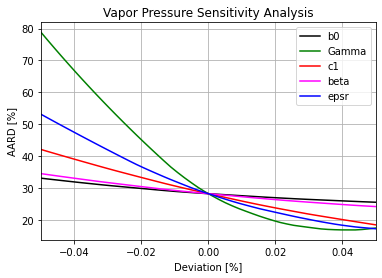

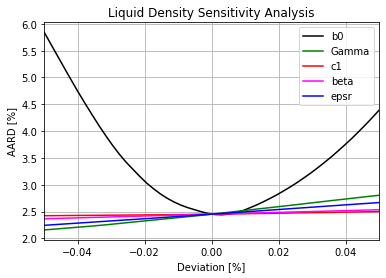

In [5]:
colors = ["black", "green", "red", "magenta",  "blue"]

for i in range(0,5):
    plt.plot(deltas,psat_deviation[:,i],color=colors[i])
plt.xlabel("Deviation [%]")
plt.ylabel("AARD [%]")
plt.legend(["b0", "Gamma", "c1", "beta", "epsr"])
plt.grid()
plt.xlim([np.min(deltas),np.max(deltas)])
plt.title("Vapor Pressure Sensitivity Analysis")
plt.show()

for i in range(0,5):
    plt.plot(deltas,rho_deviation[:,i],color=colors[i])
plt.xlabel("Deviation [%]")
plt.ylabel("AARD [%]")
plt.legend(["b0", "Gamma", "c1", "beta", "epsr"])
plt.grid()
plt.xlim([np.min(deltas),np.max(deltas)])
plt.title("Liquid Density Sensitivity Analysis")
plt.show()

In [6]:
#First, the thermodynamic calculations must be set up as per usua
Thermo = xt.xThermoInterface()

Tc = 769.5
Pc = 33.2
Om = 0.05 #whatever

b0 = 128.93
Gamma = 3622.5
c1 = 0.9100

AssocEng =  1420.0
AssocVol = 20.0
AssocSch = 24

Thermo.NoPureComp(1)
Thermo.CritProps(1,Tc,Pc,Om)
Thermo.CPAParams(1,b0,Gamma,c1)
Thermo.AssocParams(1,AssocSch,AssocVol,AssocEng)

#From here we create a CPA_optimizer object
optimizer = xt.CPA_Optimizer()

#The optimizer is now given a model to use, the xThermoInterface object
optimizer.AddThermo(Thermo)

#Now we add the experimental data object to the CPA_Optimizer object
optimizer.AddExp(exp_data)

#Now the optimizer have enough information to perform parameterization. Keep in mind that CPA_Optimizer is solely for
#CPA model, a
b0_new, Gamma_new, c1_new, AssocVol_new, AssocEng_new = optimizer.Calculation()

In [8]:
#First, the thermodynamic calculations must be set up as per usua
Thermo = xt.xThermoInterface()

Tc = 769.5
Pc = 33.2
Om = 0.05

b0 = b0_new
Gamma = Gamma_new
c1 = c1_new

AssocEng =  AssocEng_new
AssocVol = AssocVol_new
AssocSch = 24

Thermo.NoPureComp(1)
Thermo.CritProps(1,Tc,Pc,Om)
Thermo.CPAParams(1,b0,Gamma,c1)
Thermo.AssocParams(1,AssocSch,AssocVol,AssocEng)


UncertaintyAnalysis = xt.CPA_UncertaintyAnalysis()


UncertaintyAnalysis.AddThermo(Thermo)


UncertaintyAnalysis.AddExp(exp_data)


(psat_deviation, rho_deviation, deltas) = UncertaintyAnalysis.Sensitivity_Analysis()


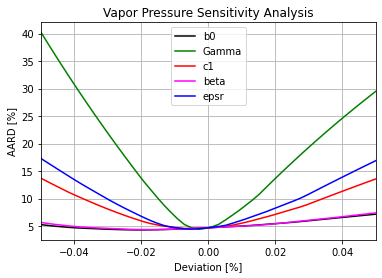

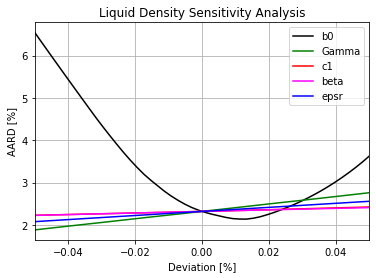

In [9]:
colors = ["black", "green", "red", "magenta",  "blue"]

for i in range(0,5):
    plt.plot(deltas,psat_deviation[:,i],color=colors[i])
plt.xlabel("Deviation [%]")
plt.ylabel("AARD [%]")
plt.legend(["b0", "Gamma", "c1", "beta", "epsr"])
plt.grid()
plt.xlim([np.min(deltas),np.max(deltas)])
plt.title("Vapor Pressure Sensitivity Analysis")
plt.show()

for i in range(0,5):
    plt.plot(deltas,rho_deviation[:,i],color=colors[i])
plt.xlabel("Deviation [%]")
plt.ylabel("AARD [%]")
plt.legend(["b0", "Gamma", "c1", "beta", "epsr"])
plt.grid()
plt.xlim([np.min(deltas),np.max(deltas)])
plt.title("Liquid Density Sensitivity Analysis")
plt.show()